In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pandas import Series
from ehyd_tools.data_processing import data_validation, data_availability, max_10a, create_statistics, agg_data_figure
from ehyd_tools.in_out import get_ehyd_data, import_series, export_series, STATIONS_PRECIPITATION_HIGH_RES
from ehyd_tools.sww_utils import span_table
from ehyd_tools.in_out import get_station_reference_data

In [3]:
STATIONS_PRECIPITATION_HIGH_RES

{'100180': 'Tschagguns',
 '100370': 'Thüringen',
 '100446': 'Lustenau',
 '100479': 'Dornbirn',
 '100776': 'Bregenz',
 '101303': 'Leutasch-Kirchplatzl',
 '101816': 'Ladis-Neuegg',
 '102772': 'Kelchsau',
 '103143': 'St.Johann in Tirol-Almdorf',
 '103895': 'Eugendorf',
 '104604': 'Schlägl',
 '104877': 'Linz-Urfahr',
 '105445': 'Vöcklabruck',
 '105528': 'Wels',
 '105908': 'Flachau',
 '106112': 'Liezen',
 '106252': 'Wildalpen',
 '106435': 'Klaus an der Pyhrnbahn',
 '106559': 'Steyr',
 '106856': 'Weitersfelden-Ritzenedt',
 '107029': 'Lunz am See',
 '107284': 'Melk',
 '107854': 'Hollabrunn',
 '108118': 'Wien (Botanischer Garten)',
 '108456': 'Gutenstein',
 '108563': 'Naglern',
 '109280': 'Waidhofen an der Thaya',
 '109918': 'Neunkirchen',
 '110064': 'Gattendorf',
 '110312': 'Karl',
 '110734': 'Eisenstadt',
 '111112': 'Oberwart',
 '111435': 'Alpl',
 '111716': 'Judenburg',
 '112086': 'Graz-Andritz',
 '112391': 'St.Peter am Ottersbach',
 '112995': 'Ried im Innkreis',
 '113001': 'Sillian',
 '1130

In [4]:
Series(STATIONS_PRECIPITATION_HIGH_RES).rename(index='id').rename('Station').to_frame()

,Station
100180,Tschagguns
100370,Thüringen
100446,Lustenau
100479,Dornbirn
100776,Bregenz
101303,Leutasch-Kirchplatzl
101816,Ladis-Neuegg
102772,Kelchsau
103143,St.Johann in Tirol-Almdorf
103895,Eugendorf


In [5]:
id_number = 112086

In [6]:
series = get_ehyd_data(id_number)

In [7]:
series = import_series(f'ehyd_{id_number}.parquet')

In [8]:
print(get_station_reference_data(id_number))

{'_raw': 'Messstelle:                Graz-AEndritz\nHZB-Nummer:                112086\nErrichtet:                 1946\nSachgebiet:                NLV\nDienststelle:              HD-Steiermark\nMessstellenbetreiber:      Hydrographischer Dienst\n\nHoehe:\n gueltig seit:              Hoehe [m ue.AE.]:\n  01.01.1946               360\n  01.01.2011               361\n\nGeographische Koordinaten (Referenzellipsoid: Bessel 1841):\n gueltig seit:              Laenge (Grad,Min,Sek):    Breite  (Grad,Min,Sek):\n  01.01.2011               15 24 38                 47 06 22\n  01.01.1946               15 24 46                 47 06 05\n\nMessgroessen,-art:           seit:     bis:\n  Niederschlag-Ombrometer  1946\n  Niederschlag-Ombrograph  2007\n  Schneehoehe               1946\n  Neuschneehoehe            1946\n  Temperatur               1947\n', 'Messstelle': 'Graz-AEndritz', 'HZB-Nummer': '112086', 'Errichtet': '1946', 'Sachgebiet': 'NLV', 'Dienststelle': 'HD-Steiermark', 'Messstellenbetreibe

In [9]:
series.head(), series.tail()

(datetime
 2007-09-17 13:56:00    0.0
 2007-09-17 13:57:00    0.0
 2007-09-17 13:58:00    0.0
 2007-09-17 13:59:00    0.0
 2007-09-17 14:00:00    0.0
 Freq: min, Name: N-Minutensummen-112086, dtype: float64,
 datetime
 2019-12-31 23:56:00    0.0
 2019-12-31 23:57:00    0.0
 2019-12-31 23:58:00    0.0
 2019-12-31 23:59:00    0.0
 2020-01-01 00:00:00    NaN
 Freq: min, Name: N-Minutensummen-112086, dtype: float64)

In [10]:
export_series(series, filename=f'ehyd_{id_number}', save_as='csv', unix=False)

'ehyd_112086.csv'

In [11]:
export_series(series, filename=f'ehyd_{id_number}', save_as='parquet')

'ehyd_112086.parquet'

In [12]:
tags = data_validation(series)
availability = data_availability(tags)
availability

2007-01-01 00:00:00    False
2007-01-01 00:01:00    False
2007-01-01 00:02:00    False
2007-01-01 00:03:00    False
2007-01-01 00:04:00    False
                       ...  
2020-12-31 23:55:00    False
2020-12-31 23:56:00    False
2020-12-31 23:57:00    False
2020-12-31 23:58:00    False
2020-12-31 23:59:00    False
Freq: min, Length: 7364160, dtype: bool

In [13]:
max_10a(availability)

(Timestamp('2009-12-31 23:59:00'), Timestamp('2019-12-31 23:59:00'))

In [14]:
span_table(~availability)

,start,end
0,2007-01-01,2007-09-17 13:55:00
1,2020-01-01,2020-12-31 23:59:00


In [15]:
availability_cut = 0.9
stats = create_statistics(series, availability, availability_cut=availability_cut)

In [16]:
stats

{'maximum': 1189.2450000000001,
 'maximum_date': Timestamp('2009-12-31 00:00:00'),
 'maximum_avail': 1.0,
 'minimum': 564.231,
 'minimum_date': Timestamp('2019-12-31 00:00:00'),
 'minimum_avail': 1.0,
 'mean': 835.0704999999999,
 'mean_avail': 0.8777728854098718}

In [17]:
print(
    f'The annual totals of the data series serve as the data basis.\n'
    f'The following statistics were analyzed:\n'
    f'Only years with a availability of {availability_cut} will be evaluated.\n'
    f'\n'
    f'The maximum is {stats["maximum"]:0.0f} mm and was in the year {stats["maximum_date"]:%Y} (with {stats["maximum_avail"]:0.0%} Data available).\n'
    f'The minimum is {stats["minimum"]:0.0f} mm and was in the year {stats["minimum_date"]:%Y} (with {stats["minimum_avail"]:0.0%} Data available).\n'
    f'The mean is {stats["mean"]:0.0f} mm (with {stats["mean_avail"]:0.0%} Data available in average).')

The annual totals of the data series serve as the data basis.
The following statistics were analyzed:
Only years with a availability of 0.9 will be evaluated.

The maximum is 1189 mm and was in the year 2009 (with 100% Data available).
The minimum is 564 mm and was in the year 2019 (with 100% Data available).
The mean is 835 mm (with 88% Data available in average).


(<Figure size 2338.58x1653.54 with 2 Axes>,
 <Axes: xlabel='Zeit', ylabel='Niederschlag (mm/Monat)'>)

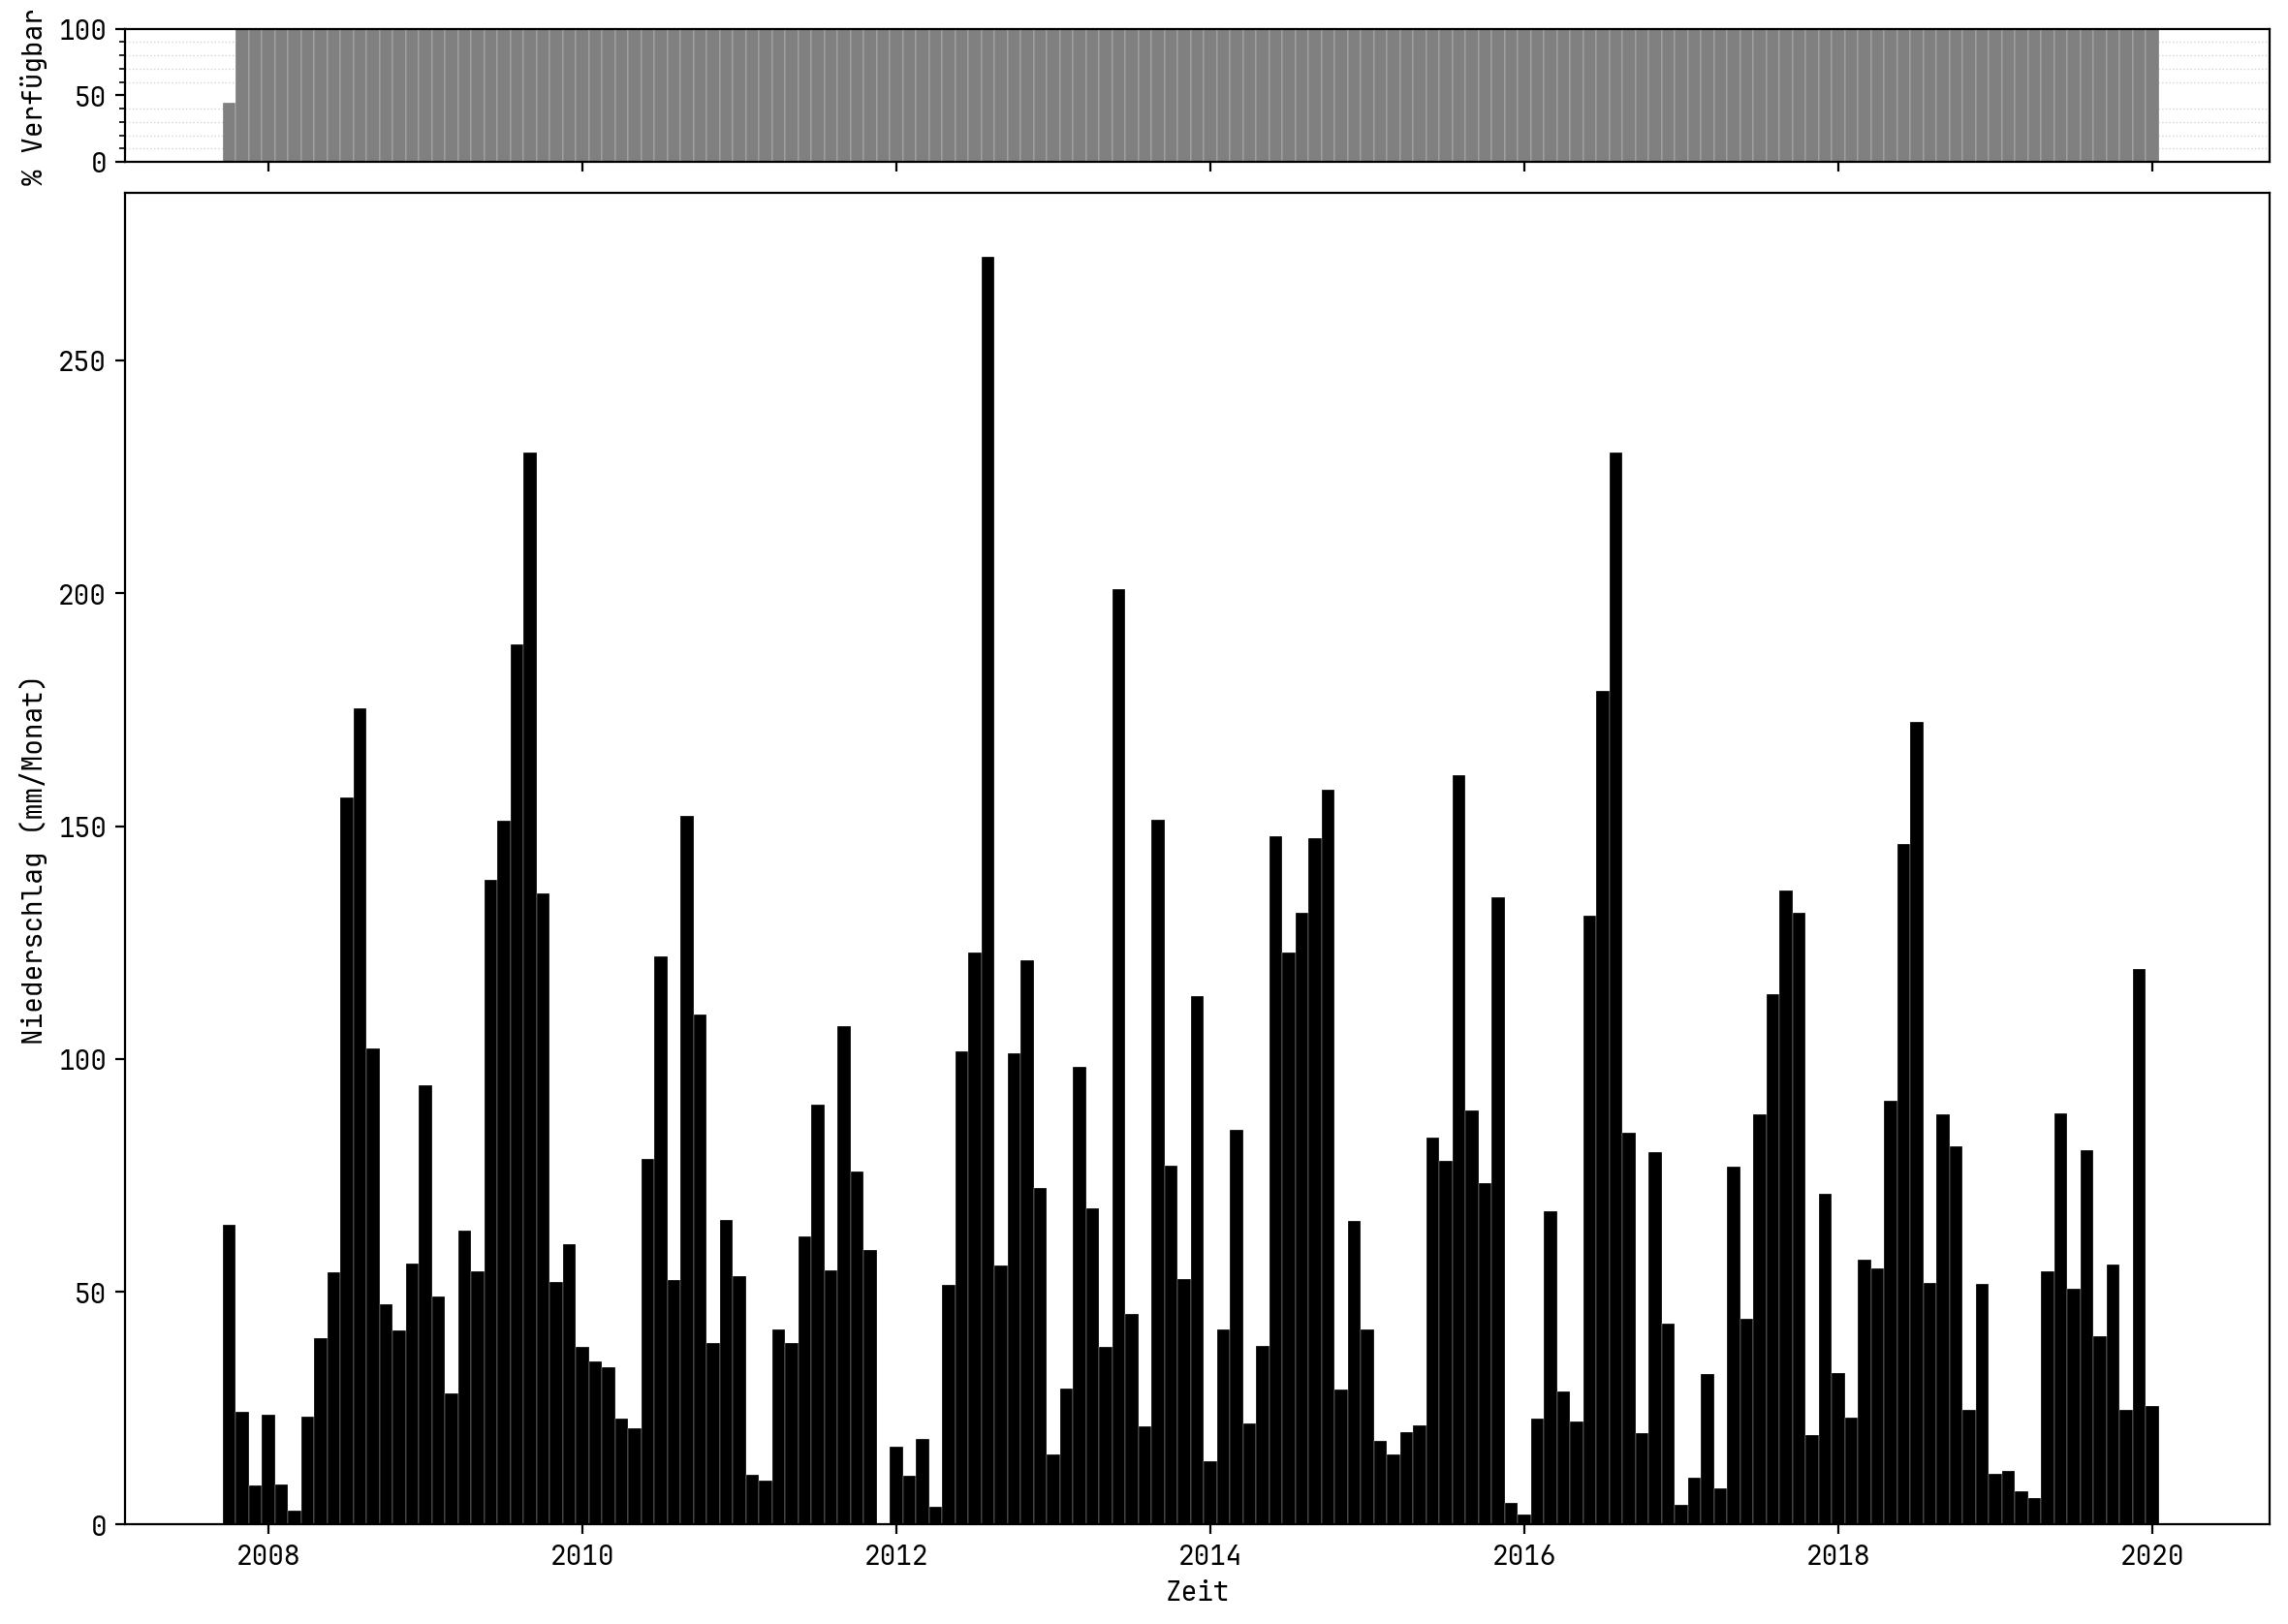

In [18]:
agg_data_figure(series, availability)